In [5]:
%reload_ext autoreload

# Imports

%load_ext autoreload
%autoreload 2

%matplotlib inline
import sys
import pandas as pd

sys.path.append('../lib')
import utils
import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [10]:
utils.data_summary(df_raw)

Column                                   Mean    Trimmed Mean    Median          Std        cv
-------------------------------  ------------  --------------  --------  -----------  --------
days_active                       681.559          612.713        527     566.071     0.830554
nps                                 4.40672        nan              5       3.5339    0.801936
last_login_days                    26.1673         nan              0      59.6729    2.28044
last_login_concern                  0.287724       nan              0       0.452774  1.57364
golive_days                        67.6303          33.6183         4     142.993     2.11433
cases_total                         9.12935        nan              5      13.0971    1.43462
cases_open                          0.791624       nan              0       1.37527   1.73727
cases_closed                        0.791624       nan              0       1.37527   1.73727
cases_age_hours_total            2298.93           nan  

In [13]:
df_raw.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9], axis = 0).T

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
days_active,82.000000,154.000000,249.400000,377.000000,527.0,722.0,923.000000,1177.400000,1518.200000
nps,0.000000,0.000000,1.000000,3.000000,5.0,5.0,7.000000,8.000000,10.000000
last_login_days,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.000000,32.000000,102.000000
last_login_concern,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000
golive_days,-1.000000,-1.000000,-1.000000,-1.000000,4.0,24.0,53.000000,101.000000,199.000000
cases_total,1.000000,2.000000,3.000000,4.000000,5.0,6.0,9.000000,13.000000,22.000000
cases_open,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,1.000000,2.000000
cases_closed,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,1.000000,2.000000
cases_age_hours_total,43.000000,215.000000,489.000000,773.000000,1204.0,1732.0,2482.000000,3645.000000,5693.000000
cases_age_hours_average,72.701961,117.242857,156.105114,190.233333,249.2,285.6,366.766667,400.973077,593.739394


In [26]:
deciles = df_raw['cases_age_hours_total'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

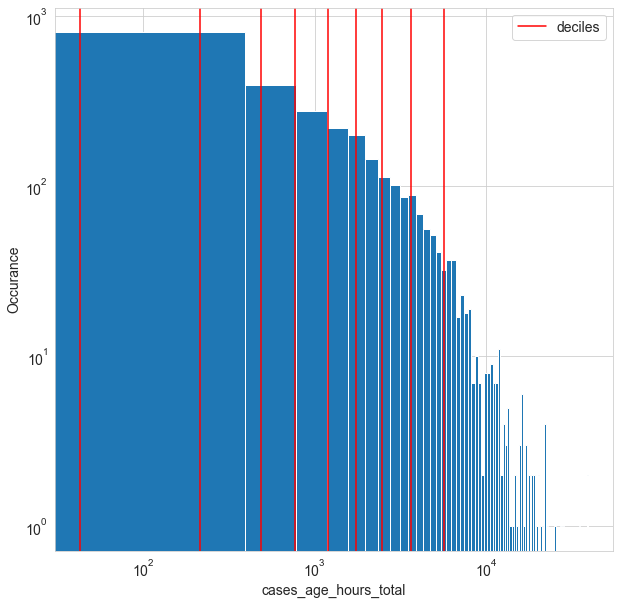

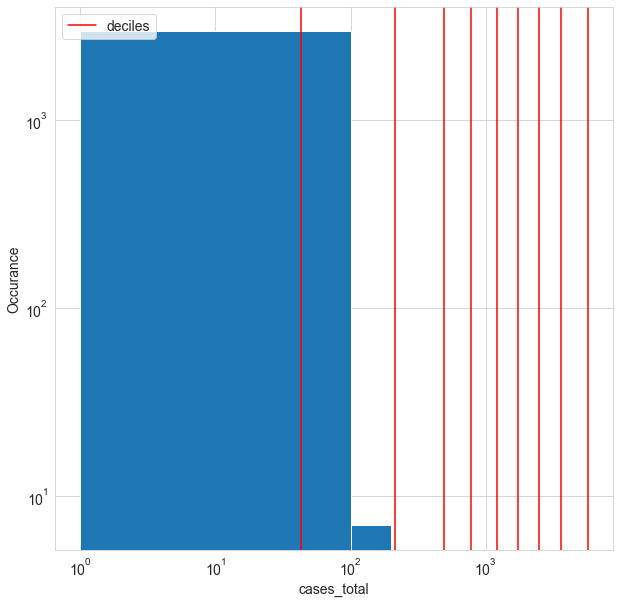

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt

def decile_bins(df_raw, feature, bins=100):
    sb.set_style('whitegrid')
    fig, ax = plt.subplots()
    df_raw[feature].hist(ax=ax, bins=bins,figsize=[10,10])

    for pos in deciles:
        handle = plt.axvline(pos, color='r')
    
    ax.legend([handle],['deciles'],fontsize=14)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.tick_params(labelsize=14)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Occurance', fontsize=14)
    
decile_bins(df_raw, 'cases_age_hours_total')
decile_bins(df_raw, 'cases_total',2)

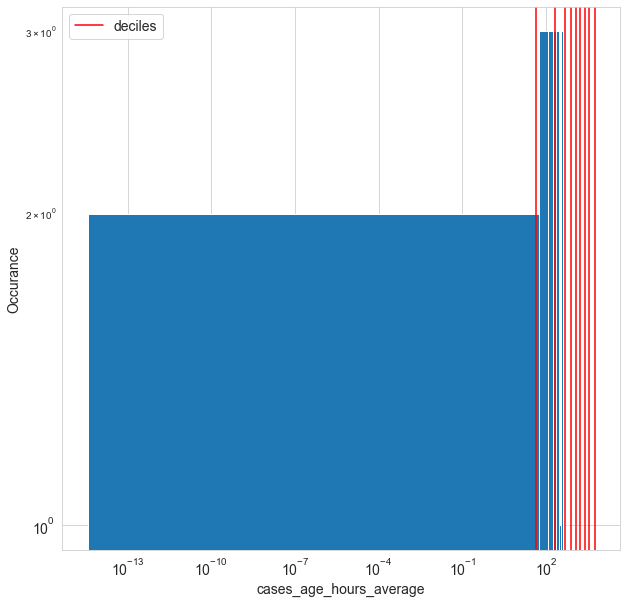

In [57]:
decile_bins(df_raw, 'cases_age_hours_average',20)